#### Batch training vs Stochastic training

In order for Tensorflow to compute the variable gradient for backpropagation to work, we have to measure the loss on one example or on the average of multiple examples at once. Stochastic training is only putting througone randomly selected example at a time, just we did in the previous example, while batch training will take a larger portion and average over them before updating the variables. Batch sizes may vary.

>In the example below, we would perform update on the variable using batch gradient descent

In [2]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Start session
sess = tf.Session()

> we declare the batch size. This is how many data observation will be fed into the computational graph as once:
    

In [3]:
# Declare batch size
batch_size = 20

> Next we declare the data, Variables and Placholders. We will make them 2 dimensional because of the batch size. The first dimension which will hold the batch size will be set to None. None here is a generalization which means it can accept any dimension later, and the second dimension is number of features/points a particular data has.

In [4]:
# Training data
x_vals = np.random.normal(1, 0.1, 100)
# Training labels
y_vals = np.repeat(10., 100)

X_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
Y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# It is good practice to initialize the weight to zero
W = tf.Variable(tf.constant(0., shape=[1,1]))

Instructions for updating:
Colocations handled automatically by placer.


>Now we add our operation to the graph, which will now be matrix
multiplication -because we vectorizing over multiple samples at a time- instead of regular multiplication. Remember that matrix
multiplication is not communicative so we have to enter the matrices
in the correct order in the matmul() function:

In [5]:
# Compute the output of the model
Y_pred = tf.matmul(X_data, W)

# Initialize our variables
init = tf.global_variables_initializer()

# Initialize our variables
sess.run(init)

> Since we are doing batch update, our Loss function (L2 norm in this case) will change because we have to average over all the L2 losses of each data point in the batch. We do this by wrapping our normal L2 loss function in the Tensorflow's ```reduce_mean()``` function:

In [6]:
# Declare the loss function
loss = tf.reduce_mean(tf.square(Y_pred - Y_target))

# Declare the optimizer - Gradient Descent
my_opt = tf.train.GradientDescentOptimizer(0.02)

# Declare the training step
train_step = my_opt.minimize(loss)

> Finally we define our training loop and iterate on the training step to optimize the algorithm. Here we will store the resulting losses on every 20 intervals in a list so we can plot and compare the result with stochastic version 

In [7]:
loss_batch = []

for i in range(100):
    # Pick a random 20 data points
    rand_index = np.random.choice(100, size=batch_size)
    # Transpose to the correct shape
    x_batch = np.transpose([x_vals[rand_index]])  
    y_batch = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={X_data: x_batch, Y_target:y_batch})
    # Print the result after 5 intervals
    if(i+1) % 5 == 0:
        print('Step #', str(i+1), 'W = ', str(sess.run(W)))
        temp_loss = sess.run(loss, feed_dict={X_data: x_batch, Y_target:y_batch})
        loss_batch.append(temp_loss)
        print('Loss = ', temp_loss)


Step # 5 W =  [[1.824272]]
Loss =  66.95858
Step # 10 W =  [[3.3331332]]
Loss =  42.69097
Step # 15 W =  [[4.55641]]
Loss =  29.92422
Step # 20 W =  [[5.5538607]]
Loss =  20.099674
Step # 25 W =  [[6.3709054]]
Loss =  12.830023
Step # 30 W =  [[7.0389266]]
Loss =  9.857984
Step # 35 W =  [[7.58155]]
Loss =  7.229051
Step # 40 W =  [[8.015248]]
Loss =  4.251708
Step # 45 W =  [[8.376527]]
Loss =  3.401818
Step # 50 W =  [[8.676042]]
Loss =  2.9867425
Step # 55 W =  [[8.898878]]
Loss =  1.8812854
Step # 60 W =  [[9.071788]]
Loss =  1.4664032
Step # 65 W =  [[9.21834]]
Loss =  1.2530934
Step # 70 W =  [[9.337782]]
Loss =  1.0264456
Step # 75 W =  [[9.456874]]
Loss =  0.9006096
Step # 80 W =  [[9.537166]]
Loss =  1.0744296
Step # 85 W =  [[9.609883]]
Loss =  0.8459217
Step # 90 W =  [[9.652787]]
Loss =  1.0010897
Step # 95 W =  [[9.698616]]
Loss =  0.9800722
Step # 100 W =  [[9.746974]]
Loss =  0.9355


> Batch training and stochastic training differ in their optimization method
and their convergence. Finding a good batch size can be difficult. To see
how convergence differs between batch and stochastic, we are going to plot the batch loss from above against the stochastic loss.

In [8]:
# Re-initialize our weight to zero again and perform the optimization on the same dataset
# It is good practice to initialize the weight to zero
W = tf.Variable(tf.constant(0., shape=[1,1]))   
Y_pred = tf.matmul(X_data, W)

# Initialize our variables
init = tf.global_variables_initializer()

# Initialize our variables
sess.run(init)

In [9]:
loss_stochastic = []

for i in range(100):
    # Pick a random 1 data points
    rand_index = np.random.choice(100, size=1)
    # Transpose to the correct shape
    x_rand = np.transpose([x_vals[rand_index]]) 
    y_rand = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={X_data: x_rand, Y_target:y_rand})
    # Print the result after 5 intervals
    if(i+1) % 5 == 0:
        print('Step #', str(i+1), 'W = ', str(sess.run(W)))
        temp_loss = sess.run(loss, feed_dict={X_data: x_rand, Y_target:y_rand})
        loss_stochastic.append(temp_loss)
        print('Loss = ', temp_loss)

Step # 5 W =  [[0.]]
Loss =  66.84189
Step # 10 W =  [[0.]]
Loss =  49.156258
Step # 15 W =  [[0.]]
Loss =  39.487366
Step # 20 W =  [[0.]]
Loss =  18.0978
Step # 25 W =  [[0.]]
Loss =  14.031954
Step # 30 W =  [[0.]]
Loss =  8.40734
Step # 35 W =  [[0.]]
Loss =  1.3476138
Step # 40 W =  [[0.]]
Loss =  3.683083
Step # 45 W =  [[0.]]
Loss =  7.269193
Step # 50 W =  [[0.]]
Loss =  1.7295023
Step # 55 W =  [[0.]]
Loss =  7.796634
Step # 60 W =  [[0.]]
Loss =  0.3272937
Step # 65 W =  [[0.]]
Loss =  1.3776621
Step # 70 W =  [[0.]]
Loss =  0.78344655
Step # 75 W =  [[0.]]
Loss =  2.6053634
Step # 80 W =  [[0.]]
Loss =  4.8219056
Step # 85 W =  [[0.]]
Loss =  2.1416843
Step # 90 W =  [[0.]]
Loss =  0.67145985
Step # 95 W =  [[0.]]
Loss =  0.13702273
Step # 100 W =  [[0.]]
Loss =  0.10586429


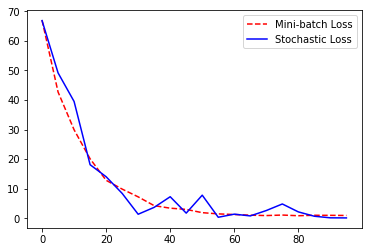

In [14]:
# Plot data

plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Mini-batch Loss')
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.legend(loc='upper right')
plt.savefig('f4.png')
plt.show()